<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:48px; font-style:normal"><b>PACKAGE : PILLOW</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2022-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

Le package [**Pillow**](https://pypi.org/project/Pillow) fournit à Python un ensemble d'outils très complets pour charger, manipuler et sauvegarder des images 2D, représentées sous la forme d'une matrice de pixels. La documentation complète du package se trouve sur le site [**readthedocs**](https://pillow.readthedocs.io/en/stable) qui contient à la fois un tutoriel présentant des exemples d'utilisation pour les fonctions les plus courantes, ainsi qu'un manuel de référence regroupant le mode d'emploi pour l'ensemble des fonctions, réparties par modules. Ce notebook a pour objet de faire un tour d'horizon rapide des fonctionnalités les plus utiles de **Pillow** dans le cadre d'une utilisation en imagerie numérique. 

Historiquement, l'écosystème Python possèdait un autre package appelé **PIL** (*Python Image Library*) spécialisé dans la mise en oeuvre des transformations et manipulations d'images. Mais le package **PIL**, développé initialement en 1995, ne fonctionne qu'avec la version 2 du langage Python, et ses auteurs n'ont pas souhaité se charger de son portage pour la version 3 du langage. Un nouveau package, nommé **Pillow**, a donc été développé en 2010 pour fournir des outils de transformations d'images compatibles avec la version 3 de Python, tout en conservant les structures de données et le formalisme mis en oeuvre dans **PIL**.

Même si **numpy** et **Pillow** permettent tous les deux de manipuler des images sous la forme d'une matrice de pixels, il est important de comprendre que les deux packages utilisent des structures de données différentes pour le stockage et la manipulation des images, ce qui signifie que les attributs et les méthodes de ces deux structures de données ne sont pas directement compatibles. Mais comme on le verra ci-dessous, les deux packages possèdent des outils de conversion permettant de passer facilement d'une structure à l'autre en fonction des opérations à effectuer.

---
A la différence de **numpy** qui est un package monolithique, le package **Pillow** est composé de nombreux modules spécialisés qui seront importés en fonction des besoins. La liste complète des 28 modules de **Pillow** (et des fonctions associées à chaque module) est disponible dans le [**manuel de référence**](https://pillow.readthedocs.io/en/stable/reference). Parmi ces 28 modules, il y en a 5 qui regroupent les fonctions les plus utiles, et qui seront les seuls présentés ici :

- **`PIL.Image`** : contient la structure de données principale et les méthodes de manipulation associées 
- **`PIL.ImageOps`** : contient des fonctions de manipulation d'images plus avancées
- **`PIL.ImageChops`** : contient des fonctions permettant la fusion de deux images en contrôlant le mélange des couleurs (***chops*** = channel operators)
- **`PIL.ImageFilter`** : contient diverses fonctions de filtrages et de convolutions discrètes sur les images
- **`PIL.ImageDraw`** : contient diverses fonctions permettant de dessiner sur les images

Ces modules sont habituellement importés via des alias courts. mais il n'y a pas de convention universelle pour ces alias. Dans ce notebook, nous allons utiliser les imports suivants :

In [1]:
import PIL.Image as pim # module principal de Pillow
import PIL.ImageOps as pio # fonctions de manipulation globale des images
import PIL.ImageChops as pic # fonctions de fusion de deux images
import PIL.ImageFilter as pif # fonctions de filtrage et de convolution
import PIL.ImageDraw as pid # fonctions de dessin et de texte
import numpy as np # 'Pillow' et 'numpy' peuvent collaborer très facilement
from SRC.tools import show, view # import de deux fonctions du module 'tools'
import warnings; warnings.filterwarnings('ignore') # on enlève les 'warnings' éventuels

<h2 style="padding:16px; color:#FFF; background:#07D">A - Module PIL.Image ( = pim)</h2>

Le module **`pim`** est le module principal de  **Pillow** qui sera systématiquement importé par toute application utilisant le package. Il contient notamment la définition de la classe **`pim.Image`** qui correspond à la structure de données interne, utilisée par **Pillow** pour la manipulation des images.

---
### 1 - Catégories d'images (= **modes**)

La feuille d'[**exercices A**](A-GenMat.ipynb) a présenté les trois familles standards d'images (***image binaire, image monochrome, image polychrome***) utilisées par les applications en imagerie numérique. Le package **Pillow** permet évidemment de manipuler ces trois familles d'images, mais il met en place une catégorisation plus précise, en définissant la notion de **mode**, inspirée par les catégories d'images utilisées par les systèmes d'exploitation et les périphériques de visualisation des ordinateurs (cartes graphiques ou imprimantes). Concrètement, **Pillow** définit ***12 modes différents***, chacun étant identifié par une chaîne de caractères :

- Mode **`'1'`** : **image binaire** (chaque pixel est défini par un booléen)
- Mode **`'L'`** : **image monochrome** (chaque pixel est défini par un octet, représentant la valeur de sa ***Luminance*** entre 0 et 255)
- Mode **`'I'`** : **image monochrome** (idem à 'L' mais chaque pixel est défini par un entier sur 32 bits)
- Mode **`'F'`** : **image monochrome** (idem à 'L' mais chaque pixel est défini par un réel sur 32 bits)
- Mode **`'P'`** : **image à palette de couleurs** (chaque pixel est défini par un octet, représentant un index vers une palette de couleurs, stockée à part)
- Mode **`'RGB'`** : **image polychrome RGB** (chaque pixel est défini par trois octets, représentant les valeurs des canaux ***Red / Green / Blue***)
- Mode **`'HSV'`** : **image polychrome HSV** (chaque pixel est défini par trois octets, représentant les valeurs des canaux ***Hue / Saturation / Value***)
- Mode **`'Lab'`** : **image polychrome CIELAB** (chaque pixel est défini par trois octets, représentant les valeurs des canaux ***Luminance / Chrominance A*** (= axe vert-rouge) ***/ Chrominance B*** (= axe bleu-jaune)
- Mode **`'CMYK'`** : **image polychrome CMYK** (chaque pixel est défini par quatre octets, représentant les valeurs des canaux ***Cyan / Magenta / Yellow / Black***)
- Mode **`'LA'`** : **image monochrome avec transparence** (chaque pixel est défini par deux octets, l'un représentant la ***Luminance*** et l'autre représentant la transparence, traditionnellement appelée **Alpha**)
- Mode **`'PA'`** : **image à palette avec transparence** (chaque pixel est défini par deux octets, l'un représentant un index vers une palette de couleurs, l'autre représentant sa transparence **Alpha**)
- Mode **`'RGBA'`** : **image polychrome RGB avec transparence** (chaque pixel est défini par quatre octets, représentant les valeurs des canaux ***Reg / Green / Blue / Alpha***)

Parmi ces 12 modes, les plus communément utilisés sont les 5 suivants : **`1 / L / P / RGB / RGBA`** 

---
### 2 - Création, Visualisation et Conversion

imagePIL.size ━► (640, 64)
imagePIL.mode ━► RGB


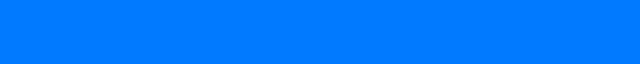

In [2]:
imagePIL = pim.new('RGB', (640, 64), '#07F') # création d'une image 'Pillow' avec couleur uniforme
show("imagePIL.size; imagePIL.mode") # image de taille 640x64 en mode 'RGB'
view(imagePIL) # affichage de l'image 'Pillow'

imageNP.shape ━► (64, 640, 3)
imageNP.dtype ━► uint8


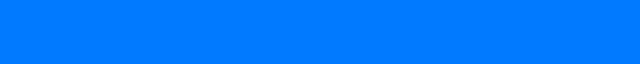

In [3]:
imageNP = np.array(imagePIL) # conversion de l'image 'Pillow' en matrice 'numpy'
# ATTENTION : la conversion inverse l'ordre des dimensions (convention usuelle des matrices)
show("imageNP.shape; imageNP.dtype") # matrice de taille 64x640x3 avec des valeurs de type 'u1'
view(imageNP) # affichage de l'image correspondant à la matrice 'numpy' (même fonction)

imageNP.shape ━► (64, 640)
imageNP.dtype ━► float64


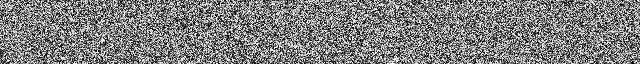

In [4]:
imageNP = np.random.random((64,640)) # création d'un bruit monochrome en 'numpy'
show("imageNP.shape; imageNP.dtype") # matrice de taille 64x640 avec des valeurs de type 'f8'
view(imageNP) # affichage de l'image 'numpy'

imagePIL.size ━► (640, 64)
imagePIL.mode ━► F


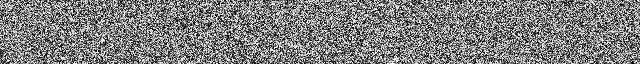

In [5]:
imagePIL = pim.fromarray(imageNP) # conversion de la matrice en image 'Pillow'
show("imagePIL.size; imagePIL.mode") # image de taille 640x64 en mode 'F'
view(imagePIL) # affichage de l'image 'Pillow'

imagePIL.size ━► (640, 64)
imagePIL.mode ━► L


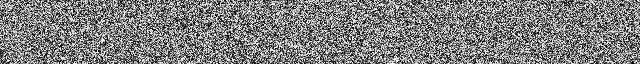

In [6]:
imagePIL = pim.fromarray((255*imageNP).astype('u1')) # conversion de la matrice en image 'Pillow'
show("imagePIL.size; imagePIL.mode") # image de taille 640x64 en mode 'L'
view(imagePIL) # affichage de l'image 'Pillow'

---
### 3 - Chargement et Sauvegarde

Le module **`pim`** contient également les fonctions pour charger une image depuis un fichier utilisant l'un des formats d'images classiques ou encore de la sauvegarder dans un fichier, en sélectionnant le format à utiliser. **Pillow** permet la lecture/écriture de nombreux formats d'images, dont la liste complète est donnée en [**annexe**](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html) du manuel de référence, mais en pratique, seuls les formats les plus courants (***JPG, PNG, GIF, WEBP...***) sont utiles au quotidien.

tiger.filename ━► IMG/tiger.jpg
tiger.format ━► JPEG
tiger.size ━► (640, 480)
tiger.mode ━► RGB
nb_colors ━► 165531

tigar.shape ━► (480, 640, 3)
tigar.dtype ━► uint8
nb_colors ━► 165531


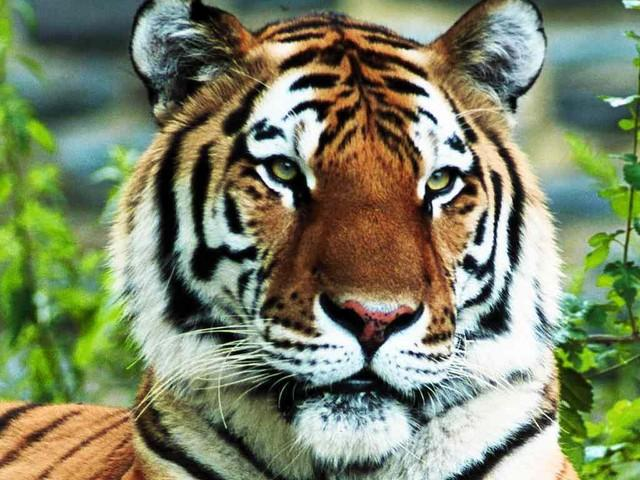

In [7]:
tiger = pim.open('IMG/tiger.jpg') # chargement d'un fichier JPG en image 'Pillow'
show("tiger.filename; tiger.format") # nom et format du fichier d'origine
nb_colors = len(tiger.getcolors(640*480)) # calcul du nombre de couleurs différentes
show("tiger.size; tiger.mode; nb_colors;") # image de taille 640x480 en mode 'RGB'

tigar = np.array(tiger) # conversion en matrice 'numpy'
nb_colors = len(np.unique(tigar.reshape(-1,3), axis=0)) # calcul du nombre de couleurs différentes
show("tigar.shape; tigar.dtype; nb_colors") # matrice de taille 480x640x3 et données de type 'u1'
view(tiger) # affichage de l'image ('tiger' ou 'tigar' sont visuellement identiques)

tigerP.size ━► (640, 480)
tigerP.mode ━► P
nb_colors ━► 108

tigarP.shape ━► (480, 640, 3)
tigarP.dtype ━► uint8
nb_colors ━► 108


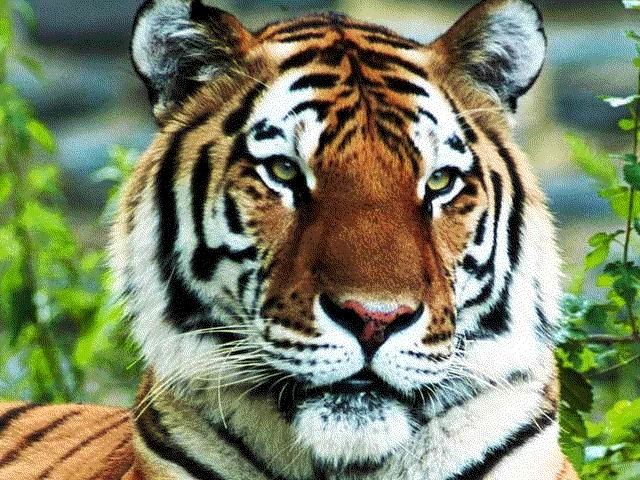

In [8]:
tigerP = tiger.convert('P') # conversion en mode 'P' (par défaut, 6R x 6G x 6B = 216 couleurs max)
nb_colors = len(tigerP.getcolors(256)) # calcul du nombre de couleurs différentes
show("tigerP.size; tigerP.mode; nb_colors;") # image de taille 640x480 en mode 'P'

palette = np.array(tigerP.getpalette(), dtype='u1').reshape(-1,3) # extraction de la palette
tigarP = palette[tigerP] # conversion en image polychrome 'numpy'
nb_colors = len(np.unique(tigerP)) # calcul du nombre de couleurs différentes
show("tigarP.shape; tigarP.dtype; nb_colors") # matrice de taille 480x640x3 et données de type 'u1'
view(tigerP) # affichage de l'image

tigerL.size ━► (640, 480)
tigerL.mode ━► L
nb_colors ━► 256

tigarL.shape ━► (480, 640)
tigarL.dtype ━► uint8
nb_colors ━► 256


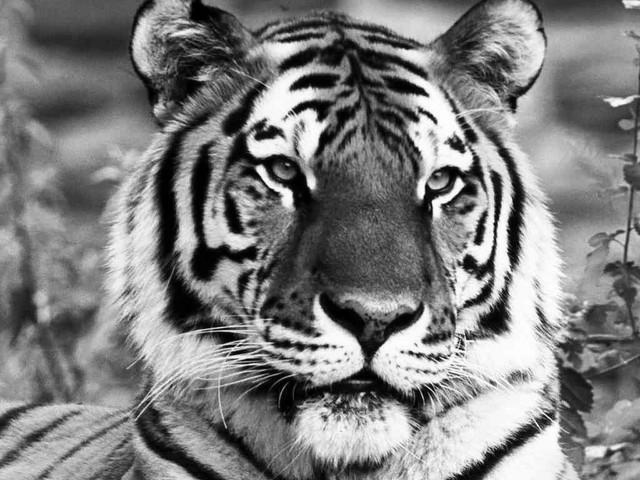

In [9]:
tigerL = tiger.convert('L') # conversion en mode 'L' (image monochrome)
nb_colors = len(tigerL.getcolors(256)) # calcul du nombre de "couleurs" différentes
show("tigerL.size; tigerL.mode; nb_colors;") # image de taille 640x480 en mode 'L'
tigerL.save('IMG/tigerL.jpg') # sauvegarde de l'image monochrome au format JPG

tigarL = np.array(tigerL) # conversion en matrice 'numpy'
nb_colors = len(np.unique(tigerL)) # calcul du nombre de "couleurs" différentes
show("tigarL.shape; tigarL.dtype; nb_colors") # matrice de taille 480x640 et données de type 'u1'
view(tigerL) # affichage de l'image

tigerB.size ━► (640, 480)
tigerB.mode ━► 1
nb_colors ━► 2

tigarB.shape ━► (480, 640)
tigarB.dtype ━► bool
nb_colors ━► 2


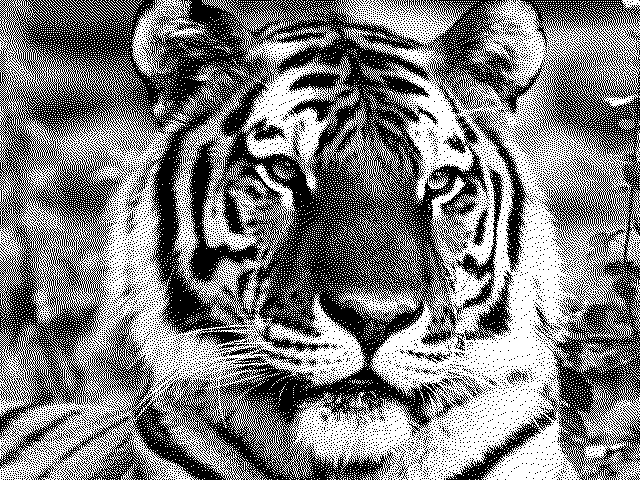

In [10]:
tigerB = tiger.convert('1') # conversion en mode '1' (image binaire)
nb_colors = len(tigerB.getcolors(256)) # calcul du nombre de "couleurs" différentes
show("tigerB.size; tigerB.mode; nb_colors;") # image de taille 640x480 en mode '1'
tigerB.save('IMG/tigerB.png') # sauvegarde de l'image binaire au format PNG

tigarB = np.array(tigerB) # conversion en matrice 'numpy'
nb_colors = len(np.unique(tigerB)) # calcul du nombre de "couleurs" différentes
show("tigarB.shape; tigarB.dtype; nb_colors") # matrice de taille 480x640 et données de type 'bool'
view(tigerB) # affichage de l'image


---
### 4 - Classe **`pim.Image`**

Le module **`pim`** contient la définition de la classe **`pim.Image`** qui est la structure interne utilisée par **Pillow** pour manipuler les images. Cette classe contient de nombreuses méthodes, chacune permettant une manipulation spécifique de l'image, avec un principe de fonctionnement commun : chaque méthode ne modifie pas directement l'image de départ, mais retourne une nouvelle image qui contient le résultat des manipulations demandées.

Les méthodes disponibles pour la classe **`pim.Image`** peuvent être classées en 2 grandes catégories :

#### Méthodes de manipulations globales

```
● copy() : duplication d'une image en mémoire
● save(filename, format=None) : sauvegarde d'une image sur disque 
● convert(mode=None, dither=None, palette=None, colors=256) : conversion de mode
● split() : séparation d'une image polychrome en 3 ou 4 images monochromes
● merge(mode, channels) : fusion de 3 ou 4 images monochromes en une image polychrome
```

#### Méthodes de transformation géométriques

```
● resize(size, resample) : contraction ou dilation 
● transpose(method) : tranposition ou symétrie
● rotate(angle, resample, expand, center=None, translate=None, fillcolor=None) : rotation
● transform(size, method, data=None, resample=0, fill=1, fillcolor=None) : transfo affine
● crop(box=None) : découpage d'une partie rectangulaire de image
● paste(image, box=None, mask=None) : collage d'une image dans une autre
```

smiley.size ━► (120, 120)
smiley.mode ━► RGBA


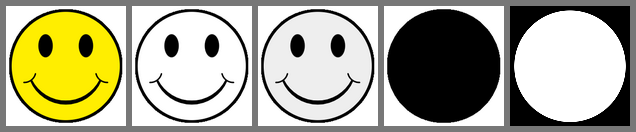

In [11]:
smiley = pim.open('IMG/smiley.png') # chargement de l'image 'smiley.png'
show("smiley.size; smiley.mode") # image de taille 120x120 en mode 'RGBA'
R, G, B, A = smiley.split() # séparation de l'image RGBA en 4 images monochromes
w, h = smiley.size; dw, dh = 6, 6 # taille de l'image et taille de la bordure
out = pim.new('RGB', (5*w + 6*dw, h + 2*dh), '#777') # création du support de collage (couleur '#777')
for n, img in enumerate((smiley, R, G, B, A)): # itération sur les 5 images
  out.paste(img, (n*(w+dw)+dw, dh)) # collage de l'image courante dans le support
view(out) # affichage du collage final

<h2 style="padding:16px; color:#FFF; background:#07D">B - Autres modules de Pillow</h2>

Les autres modules de **Pillow** sont de taille plus petite que le module **`pim`**, et chacun d'eux est spécialisé dans un domaine spécifique pour les manipulations d'images.

---
### 1 - Module **PIL.ImageOps** (= **pio**)

Le module **`pio`** regroupe des fonctions de manipulation globale sur les images, et complète les méthodes disponibles dans le module **`pim`**

#### Fonctions de transformations optiques 
```
● invert(image) : inversion d'une image (= négatif photo)
● equalize(image, mask=None) : égalisation d'histogramme
● autocontrast(image, cutoff=0, mask=None, preserve_tone=False) : ajustement du contraste
● colorize(image, black, white, mid=None, blackpoint=0, whitepoint=255, midpoint=127) : colorisation d'une image monochrome par interpolation sur trois niveaux de luminance
```

#### Fonctions de transformations géométriques 
```
● scale(image, factor, resample) : contraction ou dilatation selon factor
● expand(image, border=0, fill=0) : ajout d'une bordure uniforme autour de l'image
● crop(image, border=0) : suppression d'une bordure uniforme autour de l'image
● pad(image, size, resample, color, centering) : version étendue de 'expand' 
● fit(image, size, resample, bleed, centering) : version étendue de 'crop'
● deform(image, deformer, resample) : déformation arbitraire (assez complexe !)
```

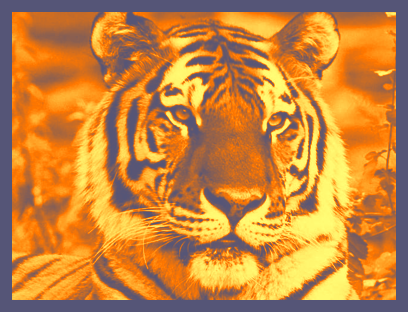

In [12]:
img = pio.scale(tigerL, 0.6) # contraction d'un facteur 0.6
low, mid, high = '#557', '#F70', '#FF7' # définition des 3 couleurs (gris bleuté, orange, jaune)
img = pio.colorize(img, low, high, mid) # colorisation avec interpolation des 3 couleurs
img = pio.expand(img, 12, low) # ajout d'une bordure de 12 pixels
view(img)

---
### 2 - Module **PIL.ImageChops** (= **pic**)

Le module **`pic`** regroupe des fonctions permettant la fusion de deux images, en contrôlant le mélange des couleurs (***note :*** les images à fusionner doivent être de même taille et de même mode) 

```
 l'algorithme "Hard Light" l'algorithme "Hard Light"● blend(image1, image2, alpha) : fusion de deux images selon une valeur de transparence
● composite(image1, image2, mask) : fusion de deux images selon un masque binaire
● alpha_composite(image1, image2) : fusion de deux images selon un masque de transparence

● add(image1, image2, scale=1.0, offset=0) : fusion par addition et décalage
● subtract(image1, image2, scale=1.0, offset=0) : fusion par soustraction et décalage
● add_modulo(image1, image2) : fusion par addition et modulo
● subtract_modulo(image1, image2) : fusion par soustraction et modulo
● difference(image1, image2) : fusion par valeur absolue de la différence 
● multiply(image1, image2) : fusion par multiplication

● darker(image1, image2) : fusion de deux images avec priorité aux pixels sombres
● lighter(image1, image2) : fusion de deux images avec priorité aux pixels sombres
● soft_light(image1, image2) : fusion de deux images avec 
● hard_light(image1, image2) : fusion de deux images avec l'algorithme "Hard Light"
● screen(image1, image2) : fusion de deux images avec l'algorithme "Screen"
● overlay(image1, image2) : fusion de deux images avec l'algorithme "Overlay"
```

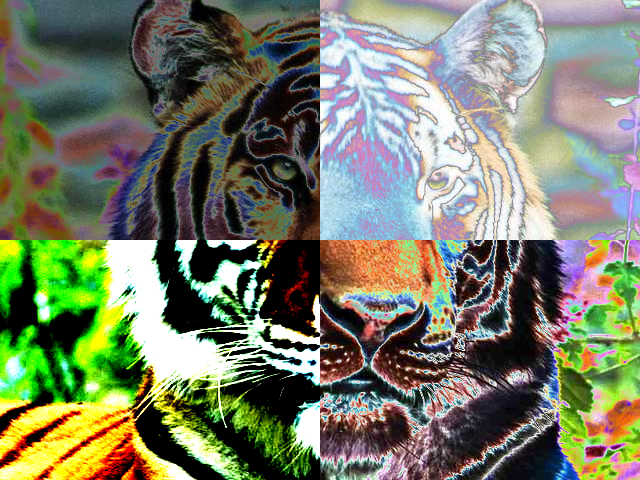

In [13]:
tigerN = pio.invert(tiger) # création du négatif photo du tigre
out = pic.darker(tiger, tigerN) # fusion avec priorité aux pixels sombres
img = pic.lighter(tiger, tigerN) # fusion avec priorité aux pixels clairs
out.paste(img.crop((320,0,640,240)), (320,0)) # collage sur quadrant NE
img = pic.subtract(tiger, tigerN, 0.5, 128) # fusion par soustraction et décalage
out.paste(img.crop((0,240,320,480)), (0,240)) # collage sur quadrant SW
img = pio.invert(pic.difference(tiger, tigerN)) # fusion par différence absolue et inversion
out.paste(img.crop((320,240,640,480)), (320,240)) # collage sur quadrant SE
view(out) # affichage du collage final

---
### 3 - Module **PIL.ImageFilter** (= **pif**)

Le module **`pif`** regroupe des fonctions de filtrage et de convolution sur les images, qui sont toutes destinées à être utilisé avec la méthode **`filter`** de la classe **`pim.Image`** :

> **`image.filter(method)`**

Le paramètre **`method`** correspond soit à valeur prédéfinie, permettant de choisir un des noyaux de convolution classiques en traitement d'images (définis sur un voisinage fixe 3x3 ou 5x5) :

```
● pif.BLUR : filtre de flou 5x5
● pif.SMOOTH : filtre de lissage 3x3
● pif.SMOOTH_MORE : filtre de lissage 5x5
● pif.FIND_EDGES : filtre de détection de contours 3x3
● pif.CONTOUR : filtre d'accentuation des contours 3x3
● pif.EDGE_ENHANCE : filtre de rehaussement de contours 3x3
● pif.EDGE_ENHANCE_MORE : filtre de rehaussement de contours 3x3
● pif.SHARPEN : filtre d'amélioration de la netteté 3x3
● pif.DETAIL : filtre d'accentuation des détails 3x3
● pif.EMBOSS : filtre d'embossage 3x3
```

soit à un appel de fonction correspondant généralement à un filtre avec un voisinage de taille variable :

```
● BoxBlur(radius) : filtre de flou uniforme sur voisinage de taille variable
● GaussianBlur(radius=2) : filtre de flou gaussien sur voisinage de taille variable
● UnsharpMask(radius=2, percent=150, threshold=3) : filtre de netteté de taille variable
● MinFilter(size=3) : filtre minimum sur voisinage de taille variable
● MedianFilter(size=3) : idem pour filtre median
● ModeFilter(size=3) : idem pour filtre mode
● MaxFilter(size=3) : idem pour filtre maximum
● RankFilter(size, rank) : idem pour filtre de tri
● Kernel(size, kernel, scale=None, offset=0) : convolution à noyau arbitraire 3x3 ou 5x5
```

La fonction **`Kernel`** permet de créer ses propres noyaux de convolution (uniquement taille 3x3 ou 5x5) pour les appliquer aux images. Cette fonction permet notamment de reproduire les filtres prédéfinis listés plus haut, en utilisant les paramètres suivants :

```
● BLUR : (5,5), (1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1), 16, 0
● SMOOTH : (3,3), (1,1,1,1,8,1,1,1,1), 16, 0
● SMOOTH_MORE : (5,5), (1,1,1,1,1,1,4,4,4,1,1,4,16,4,1,1,4,4,4,1,1,1,1,1,1), 64, 0
● FIND_EDGES : (3,3), (-1,-1,-1,-1,8,-1,-1,-1,-1), 1, 0
● CONTOUR : (3,3), (-1,-1,-1,-1,8,-1,-1,-1,-1), 1, 255
● EDGE_ENHANCE : (3,3), (-1,-1,-1,-1,10,-1,-1,-1,-1), 2, 0
● EDGE_ENHANCE_MORE : (3,3), (-1,-1,-1,-1,9,-1,-1,-1,-1), 1, 0
● SHARPEN : (3,3), (-1,-1,-1,-1,16,-1,-1,-1,-1), 8, 0 
● DETAIL : (3,3), (0,-1,0,-1,12,-1,0,-1,0), 8, 0
● EMBOSS : (3,3), (-1,0,0,0,1,0,0,0,0), 1, 0
```

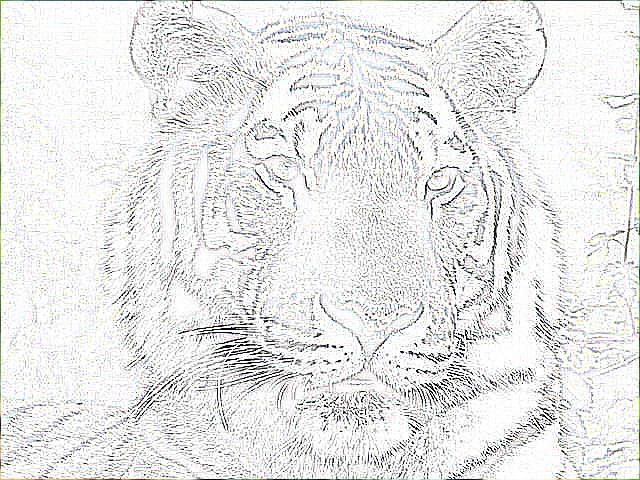

In [14]:
img = tiger.filter(pif.CONTOUR) # détection des contours
view(img) # affichage de l'image

---
### 4 - Module **PIL.ImageDraw** (= **pid**)

Le module **`pid`** regroupe des fonctions permettant de rajouter du texte ou des dessins sur les images.

```
● point(pos, fill=None) : pixel unique
● line(box, fill=None, width=0, joint=None) : segment de droite
● rectangle(box, fill=None, outline=None, width=1) : rectangle
● rounded_rectangle(box, radius=0, fill=None, outline=None, width=1) : rectangle arrondi
● regular_polygon(box, n, rotation=0, fill=None, outline=None) : polygone régulier 
● polygon(coords, fill=None, outline=None, width=1) : polygone quelconque
● floodfill(image, xy, value, border=None, thresh=0) : forme de couleur homogène

● ellipse(box, fill=None, outline=None, width=1) : cercle ou ellipse
● arc(box, start, end, fill=None, width=0) : arc de cercle ou arc d'ellipse
● chord(box, start, end, fill=None, outline=None, width=1) : arc avec droite
● pieslice(box, start, end, fill=None, outline=None, width=1) : arc avec angle

● text(xy, text, fill=None, font=None, anchor=None, spacing=4, align='left', direction=None, stroke_width=0, stroke_fill=None) : chaîne de caractères
● multiline_text(xy, text, fill=None, font=None, anchor=None, spacing=4, align='left', direction=None, stroke_width=0, stroke_fill=None) : chaîne de caractères multi-lignes
```

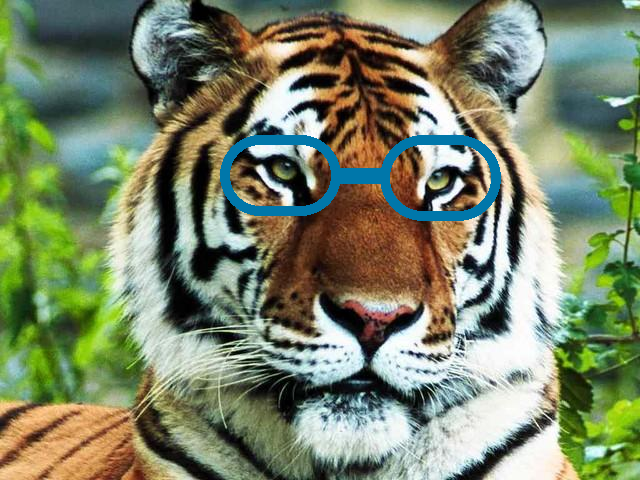

In [15]:
img = tiger.copy() # création d'une copie de travail pour l'image du tigre
canvas = pid.Draw(img) # création d'une zone de dessin (= canvas) associée à l'image
canvas.rounded_rectangle((220,135,340,215), 48, outline='#07A', width=10) # ajout de lunettes
canvas.rounded_rectangle((380,135,500,220), 48, outline='#07A', width=10)
canvas.line((340,175,380,175), fill='#07A', width=16)
view(img) # affichage de l'image

---